<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузка-и-изучение-данных" data-toc-modified-id="Загрузка-и-изучение-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузка и изучение данных</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li></ul></div>

# Защита персональных данных клиентов
**Описание проекта**<br>
Нам нужно защитить данные клиентов страховой компании «Хоть потоп».<br>
Разработаем такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию. <br>
Обоснуем корректность его работы.<br>

**Цель проекта:**<br>
Нужно защитить данные, чтобы при преобразовании качество моделей машинного обучения не ухудшилось.

**Шаги выполнения проекта:**
1. Загрузим и изучим данные.
2. Ответим на вопрос и обоснуем решение.
   Признаки умножают на обратимую матрицу. 
   Изменится ли качество линейной регрессии? 
   - Изменится. Приведите примеры матриц.
   - Не изменится. Укажите, как связаны параметры линейной регрессии в исходной задаче и в преобразованной.
3. Предложим алгоритм преобразования данных для решения задачи. Обоснуем, почему качество линейной регрессии не поменяется.
4. Запрограммируем алгоритм, применив матричные операции. Проверим, что качество линейной регрессии из sklearn не отличается до и после преобразования. Применим метрику R2.

**Описание данных:**
- `Признаки`: пол, возраст и зарплата застрахованного, количество членов его семьи.
- `Целевой признак`: количество страховых выплат клиенту за последние 5 лет.


**Как будут проверять мой проект?** <br>
Мы подготовили критерии оценки проекта, которыми руководствуются ревьюеры. <br>
Прежде чем приступить к решению кейса, внимательно их изучите.<br>
На что обращают внимание ревьюеры, проверяя проект:
- Все ли шаги по инструкции выполняете?
- Обосновываете вывод об умножении матриц?
- Описываете и объясняете алгоритм преобразования?
- Проверяете собственный алгоритм преобразования на данных?
- Следите ли за структурой проекта?
- Поддерживаете аккуратность кода?


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
from numpy import linalg as la

import matplotlib
import matplotlib.pyplot as plt
matplotlib.style.use('ggplot')

from sklearn.model_selection import train_test_split 

In [2]:
def get_info_on_dataset(_df):

    CONST_IN_PERCENTAGES = float(100.0)
    
    try:
        _df.info()
        df_review_info = pd.DataFrame({'Not_Valid_Values_in %': (_df.isna().sum()/len(_df))*CONST_IN_PERCENTAGES} )
        print("")
        display(df_review_info.sort_values(by='Not_Valid_Values_in %', ascending=False))
        print("")
        print("Number of duplicated rows in the dataset: {}".format(_df.duplicated().sum()))
            
    except:
        print("Can't provide review on given dataset")
    
    pass


def plot_features_hists(_df,
                        _x,
                        _bins = 50, 
                        _figure_width = 20, 
                        _figure_height = 12, 
                        _color = 'turquoise',
                        _edgecolor='grey',
                        _fontsize=15):
    try:
        plt.figure(figsize=(_figure_width, _figure_height))
        sns.histplot(data=_df, color=_color, bins = _bins, edgecolor=_edgecolor, kde=True)
        plt.ylabel('Количество клиентов', fontsize=_fontsize)
        plt.xlabel(_x,fontsize=_fontsize)
        plt.yticks(fontsize=_fontsize)
        plt.xticks(fontsize=_fontsize);

    except:
        print("Can't provide boxplot plotting")
        
    pass


def plot_features_boxplot(_df,
                          _figure_width = 12, 
                          _figure_height = 8,
                          _color = 'paleturquoise',
                          _fontsize=15):
    try:
        fig, ax = plt.subplots(figsize=(_figure_width, _figure_height))
        _pl = sns.boxplot(data=_df, 
                          orient="h", 
                          color=_color)
        _pl.set_yticklabels(ax.get_yticklabels(), size = _fontsize, fontweight = 'bold');
        
    except:
        print("Can't provide boxplot plotting")  
        
    pass

## Загрузка и изучение данных

In [3]:
try:
    df_insurance = pd.read_csv('https://code.s3.yandex.net/datasets/insurance.csv')
except:
    df_insurance = pd.read_csv('insurance.csv')

In [4]:
get_info_on_dataset(df_insurance)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB



,Not_Valid_Values_in %
Пол,0.0
Возраст,0.0
Зарплата,0.0
Члены семьи,0.0
Страховые выплаты,0.0



Number of duplicated rows in the dataset: 153


In [5]:
df_insurance.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [6]:
round(df_insurance.describe(),2)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.0,5000.00,5000.00,5000.00,5000.00
mean,0.5,30.95,39916.36,1.19,0.15
std,0.5,8.44,9900.08,1.09,0.46
min,0.0,18.00,5300.00,0.00,0.00
25%,0.0,24.00,33300.00,0.00,0.00
50%,0.0,30.00,40200.00,1.00,0.00
75%,1.0,37.00,46600.00,2.00,0.00
max,1.0,65.00,79000.00,6.00,5.00


In [7]:
round(df_insurance.corr(),2)

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
Пол,1.00,0.00,0.01,-0.01,0.01
Возраст,0.00,1.00,-0.02,-0.01,0.65
Зарплата,0.01,-0.02,1.00,-0.03,-0.01
Члены семьи,-0.01,-0.01,-0.03,1.00,-0.04
Страховые выплаты,0.01,0.65,-0.01,-0.04,1.00


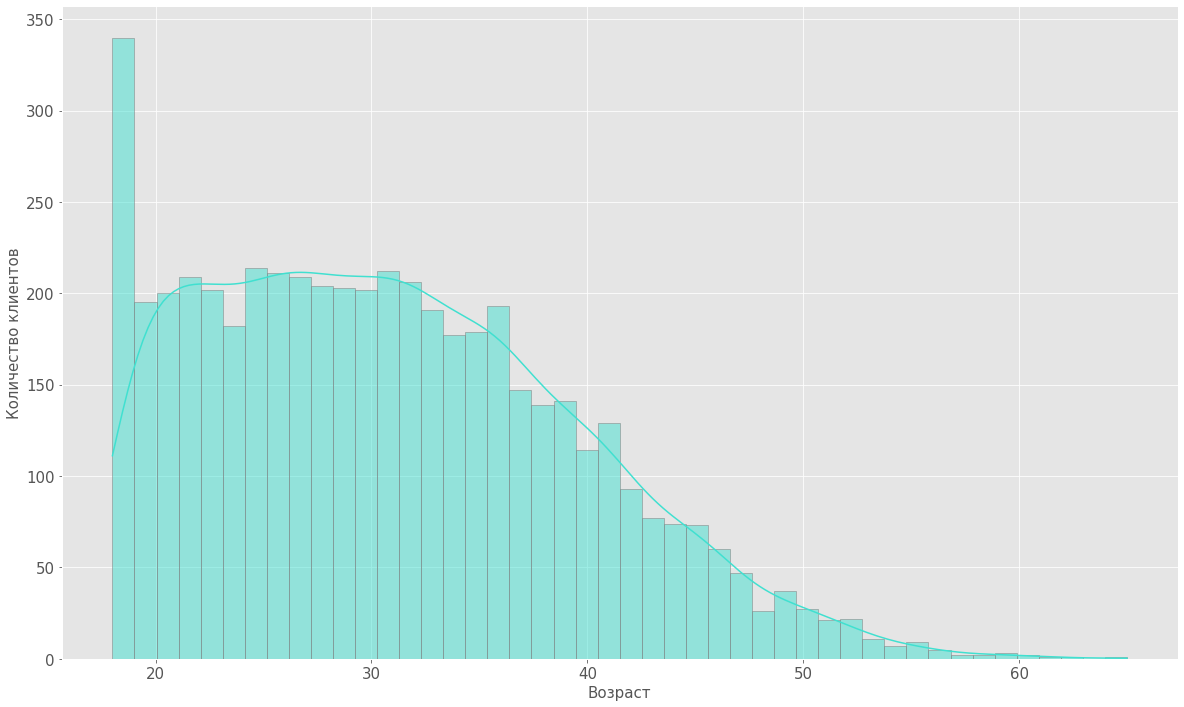

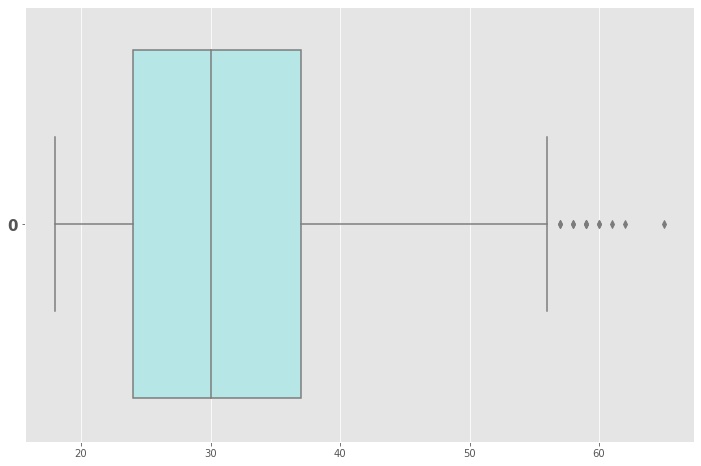

In [8]:
plot_features_hists(df_insurance['Возраст'], "Возраст", 46)
plot_features_boxplot(df_insurance['Возраст'])

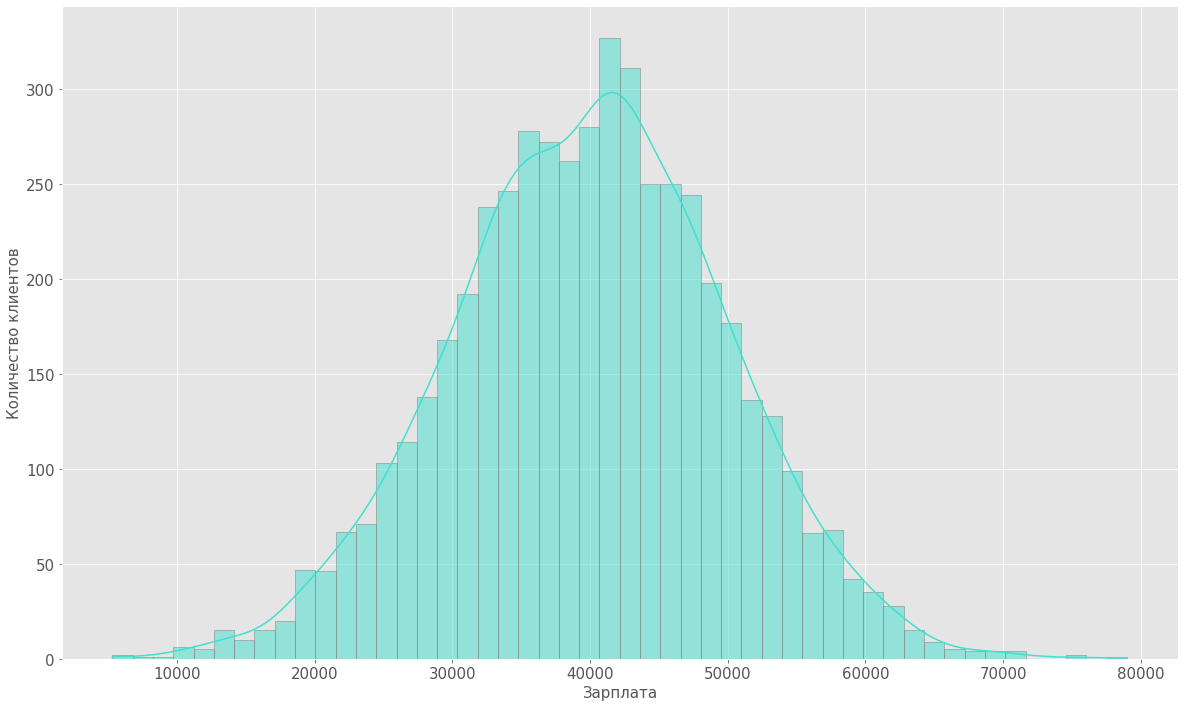

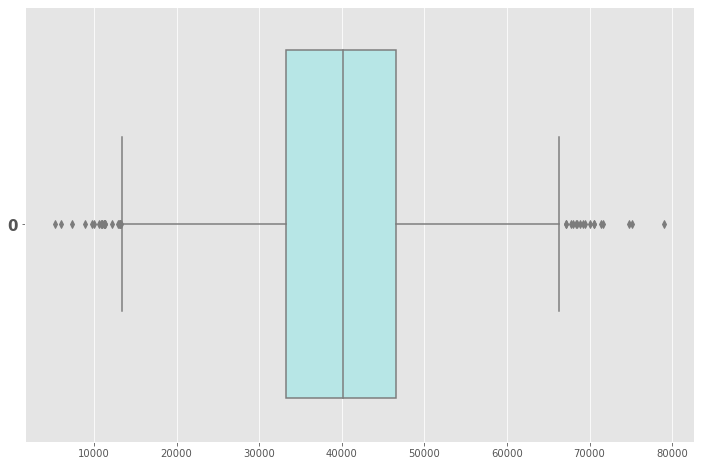

In [9]:
plot_features_hists(df_insurance['Зарплата'], "Зарплата")
plot_features_boxplot(df_insurance['Зарплата'])

In [10]:
df_insurance['Пол'].unique()

array([1, 0], dtype=int64)

In [11]:
df_insurance['Члены семьи'].unique()

array([1, 0, 2, 4, 3, 5, 6], dtype=int64)

In [12]:
df_insurance['Страховые выплаты'].unique()

array([0, 1, 2, 3, 5, 4], dtype=int64)

In [13]:
df_insurance['Возраст'] = df_insurance['Возраст'].astype('int64')
df_insurance['Зарплата'] = df_insurance['Зарплата'].astype('int64')
df_insurance.dtypes

Пол                  int64
Возраст              int64
Зарплата             int64
Члены семьи          int64
Страховые выплаты    int64
dtype: object

In [14]:
df_insurance = df_insurance.drop_duplicates()
get_info_on_dataset(df_insurance)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4847 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Пол                4847 non-null   int64
 1   Возраст            4847 non-null   int64
 2   Зарплата           4847 non-null   int64
 3   Члены семьи        4847 non-null   int64
 4   Страховые выплаты  4847 non-null   int64
dtypes: int64(5)
memory usage: 227.2 KB



,Not_Valid_Values_in %
Пол,0.0
Возраст,0.0
Зарплата,0.0
Члены семьи,0.0
Страховые выплаты,0.0



Number of duplicated rows in the dataset: 0


____________________________________________
Загрузили данные и ознакомились с ними. <br>
Исходные данные содержали 5 столбцов и 5000 строк.<br>

В процессе изучения данных обнаружили:
- корреляцию 0.65 между возрастом и количеством страховых выплат в последние 5 лет
- 153 дубликата - удалили 
- в двух столбцах `Возраст` и `Зарплата` формат данных `float64` - заменили на  `int64` (в этих колонках целые числа)

## Умножение матриц

Формула обучения:
$$
w = (X^T X)^{-1} X^T y,
$$
Предсказания:
$$
a = Xw
$$
Задача обучения:
$$
w = \arg\min_w MSE(Xw, y)
$$

Нужно установить изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу:

$$
1) \, a' = a = \tilde{X}\tilde{w},  \;\; 
$$
$$
2) \, \tilde{w} = P^{-1} w
$$

где:

- $\tilde{X} = XP$

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

**Ответ:** <br>
При умножении признаков на обратимую матрицу качество линейной регрессии **не изменится**.


**Обоснование:** <br>

$$
a = Xw
$$
$$
w = (X^T X)^{-1} X^T y
$$


$$
a' = \tilde{X}\tilde{w}, \,\,\,  \tilde{w} = P^{-1} w
$$

<br>
Заменим $\tilde{X}$ на  $XP$

$$
a = Xw = X (X^T X)^{-1} X^T y
$$

$$
a' = \tilde{X}\tilde{w} = \tilde{X} (\tilde{X}^T \tilde{X})^{-1} \tilde{X}^T y
$$

$$
a' = X P \tilde{w} = X P ((X P)^T (X P))^{-1} (X P)^T y
$$

<br>
<br>
Раскроем скобки с $(X P)$ в выражении по правилу $(AB)^T = B^T A^T$

$$
a' =  X P (P^T X^T X P)^{-1} P^T X^T y
$$

<br>
<br>
Раскроем скобки $(P^T X^T X P)^{-1}$


$$
a' =  X P P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

<br>
<br>
В выражении видим $P P^{-1}$ и $(P^T)^{-1} P^T$ - произведение матриц $P$, $P^T$ на обратные им $P^{-1}$ и $(P^T)^{-1}$ дает единичные матрицы $E$<br>

$$
a' =  X E (X^T X)^{-1} E X^T y
$$

<br>
<br>
При умножении любой матрицы $A$ на единичную $E$ получается эта же самая матрица $A$, следовательно можем просто исключить единичные матрицы из выражения. Получаем:

$$
a' =  X (X^T X)^{-1} X^T y = Xw = a
$$

________________________________________

$$
\tilde{w} = P^{-1} w
$$

<br>
Заменим $\tilde{X}$ на  $XP$

$$
w = (X^T X)^{-1} X^T y
$$

$$
w' = (\tilde{X}^T \tilde{X})^{-1} \tilde{X}^T y
$$

$$
w' = ((X P)^T (X P))^{-1} (X P)^T y
$$

<br>
<br>
Раскроем скобки с $(X P)$ в выражении по правилу $(AB)^T = B^T A^T$

$$
w' =  (P^T X^T X P)^{-1} P^T X^T y
$$

<br>
<br>
Раскроем скобки $(P^T X^T X P)^{-1}$


$$
w' =  P^{-1} (X^T X)^{-1} (P^T)^{-1} P^T X^T y
$$

<br>
<br>
В выражении видим $(P^T)^{-1} P^T$ - произведение матрицы $P^T$ на обратную ей $(P^T)^{-1}$ дает единичную матрицу $E$<br>

$$
w' =  P^{-1} (X^T X)^{-1} E X^T y
$$

<br>
<br>
При умножении любой матрицы $A$ на единичную $E$ получается эта же самая матрица $A$, исключаем единичную матрицу из выражения. Получаем:

$$
w' =  P^{-1} (X^T X)^{-1} X^T y = P^{-1} w
$$

**Вывод:** <br>
При умножении признаков $X$ на обратимую матрицу $P$ качество линейной регрессии **не изменится**. Выше мы пришли к тому,  что предсказания $ a' = $ предсказаниям $ a $. <br>
Но при этом вектор весов линейной регрессии $ w' $ будет отличаться от первоначального вектора $ w $ на $P^{-1}$.


## Алгоритм преобразования

**Алгоритм** <br>

Для защиты данных клиентов можно преобразовать исходные данные умножив таблицу /матрицу/ с признаками на любую обратимую матрицу.<br>
При этом качество модели машинного обучения не изменится.



**Проверим на примере**<br>

Зададим константы.<br>
Сгенерируем матрицу и обратную к ней.<br>
Создадим матрицу признаков и целевой вектор.<br>
И далее произведем необходимые расчеты. 

In [15]:
ITERATIONS_BASED_STOP_CONDITION_VALUE_CONST = 100

NP_RND_SEED_VALUE_CONST = 1

#генерируемая матрица должна при умножении на матрицу признаков давать матрицу такого же размера
#как исходная матрица с признаками
#исходная матрица с признаками будет состоять из 4 столбцов, так как мы удалим из нее целевой признак

ARRAY_DIM_CONST_VALUE = int(df_insurance.shape[1] - 1) 
print('Размерность генерируемой матрицы:', ARRAY_DIM_CONST_VALUE)

MATRIX_VALUES_LEFT_BOUND_CONST = float(0.1)
MATRIX_VALUES_RIGHT_BOUND_CONST = float(100.0)

Размерность генерируемой матрицы: 4


In [16]:
print('Генерируем необходимую матрицу...')

P_original = 0
np.random.seed(NP_RND_SEED_VALUE_CONST)

for i in range(ITERATIONS_BASED_STOP_CONDITION_VALUE_CONST):
    print('\n ...попытка {}'.format(i))
    P_original = np.random.uniform(low=MATRIX_VALUES_LEFT_BOUND_CONST, 
                                   high=MATRIX_VALUES_RIGHT_BOUND_CONST, 
                                   size=(ARRAY_DIM_CONST_VALUE,ARRAY_DIM_CONST_VALUE))
    
    if la.det(P_original) != 0:
        print('\n Матрица сгенерирована:')
        print(P_original)
        break

print('\n Обратная матрица:')
P_inverse = la.inv(P_original)
print(P_inverse)

Генерируем необходимую матрицу...

 ...попытка 0

 Матрица сгенерирована:
[[41.76049827 72.06041689  0.11142604 30.30302401]
 [14.76091349  9.32462562 18.70739512 34.62151663]
 [39.73707068 53.92779173 41.97753199 68.55342809]
 [20.52477975 87.8239319   2.83602056 67.07970427]]

 Обратная матрица:
[[ 0.03748687  0.05812486 -0.02452545 -0.02186999]
 [-0.0076306  -0.06134752  0.02684112  0.00767928]
 [-0.02499221 -0.08414486  0.0619698  -0.00861185]
 [-0.00042311  0.06609178 -0.03025745  0.01190935]]


In [17]:
ml_features_columns = ['Пол', 'Возраст', 'Зарплата', 'Члены семьи']
ml_target_column = ['Страховые выплаты']

X = df_insurance[ml_features_columns].values
y = df_insurance[ml_target_column].values

print('Размерность матрицы с признаками X: {}'. format(X.shape))
print(X[:5])
print('\n Размерность целевого вектора y: {}'. format(y.shape))
print(y[:5])

Размерность матрицы с признаками X: (4847, 4)
[[    1    41 49600     1]
 [    0    46 38000     1]
 [    0    29 21000     0]
 [    0    21 41700     2]
 [    1    28 26100     0]]

 Размерность целевого вектора y: (4847, 1)
[[0]
 [1]
 [0]
 [0]
 [0]]


$$ Вычисляем \;\;  w = (X^T X)^{-1} X^T y $$

In [18]:
w = la.inv(X.T.dot(X)).dot(X.T).dot(y)

print('Размерность вектора весов линейной регрессии w:', w.shape)
print(w)

Размерность вектора весов линейной регрессии w: (4, 1)
[[-4.39473445e-02]
 [ 2.35998567e-02]
 [-1.18490589e-05]
 [-4.71380340e-02]]


$$ Вычисляем \;\;  a = Xw $$

In [19]:
a = X @ w

print('Размерность вектора предсказаний a:', a.shape)
print(a)

Размерность вектора предсказаний a: (4847, 1)
[[ 0.28879543]
 [ 0.58819114]
 [ 0.43556561]
 ...
 [-0.02396203]
 [-0.05362882]
 [ 0.08863882]]


$$ Вычисляем \;\;  \tilde{X} = XP $$

In [20]:
_X = X @ P_original

print('Размерность матрицы с признаками _X:', _X.shape)
print(_X)

Размерность матрицы с признаками _X: (4847, 4)
[[1971626.18824315 2675360.6636551  2082855.53729529 3401766.89815613]
 [1510708.21247488 2049772.84233384 1596009.59177371 2606689.9368755 ]
 [ 834906.55067981 1132754.04040855  882070.68622505 1440626.01386468]
 ...
 [1347422.96373368 1828514.27991925 1423418.1543668  2324787.80197984]
 [1299830.28602791 1763979.46344695 1373085.47821697 2242690.31403381]
 [1613800.66028696 2189889.31797965 1704814.55325877 2784335.96563319]]


$$ Вычисляем \;\;  \tilde{w} = (\tilde{X}^T \tilde{X})^{-1} \tilde{X}^T y $$

In [21]:
_w = la.inv(_X.T.dot(_X)).dot(_X.T).dot(y)

print('Размерность вектора весов линейной регрессии _w:', _w.shape)
print(_w)

Размерность вектора весов линейной регрессии _w: (4, 1)
[[ 0.00075549]
 [-0.00147475]
 [-0.00048226]
 [ 0.00101733]]


$$ Вычисляем \;\;  \tilde{a} = \tilde{X}\tilde{w} $$

In [22]:
_a = _X @ _w

print('Размерность вектора предсказаний _a:', _a.shape)
print(_a)

Размерность вектора предсказаний _a: (4847, 1)
[[ 0.28879597]
 [ 0.58819156]
 [ 0.43556584]
 ...
 [-0.02396169]
 [-0.05362843]
 [ 0.08863926]]


In [23]:
delta_a = a - _a

print(delta_a) 
print('\n Расстояние между векторами предсказаний a и _a:', round(la.norm(delta_a), 5))

[[-5.39273413e-07]
 [-4.16526680e-07]
 [-2.29567888e-07]
 ...
 [-3.42460544e-07]
 [-3.94636197e-07]
 [-4.39635707e-07]]

 Расстояние между векторами предсказаний a и _a: 3e-05


$$ Вычисляем \;\;  w' = P^{-1}\tilde{w} $$

In [24]:
w_ = P_inverse @ w

print('Размерность вектора весов линейной регрессии w_:', w_.shape)
print(w_)

Размерность вектора весов линейной регрессии w_: (4, 1)
[[ 0.00075549]
 [-0.00147475]
 [-0.00048225]
 [ 0.00101733]]


In [25]:
delta_w = _w - w_
print(delta_w) 
print('\n Расстояние между векторами весов линейной регрессии _w и w_:', round(la.norm(delta_w), 5))

[[ 1.36610281e-09]
 [-3.36970522e-10]
 [-1.36477107e-09]
 [ 3.09025831e-10]]

 Расстояние между векторами весов линейной регрессии _w и w_: 0.0


____________________________________
Из расчетов видно, что разница между веторами предсказаний $a$ и $a'$, а также между векторам весов линейной регрессии $w'$ и $\tilde{w}$ незначительна.

## Проверка алгоритма

Разобьем данные на обучающую и тестовую выборки.<br>
Далее создадим функцию, которая будет шифровать данные. <br>
Создадим и обучим модель линейной регрессии на исходных данных и зашифрованных.<br>
Сравним метрики полученных моделей.<br>

In [26]:
train, test = train_test_split(df_insurance, 
                               test_size=0.2, 
                               random_state=42)   

X = train[ml_features_columns]
y = train[ml_target_column]
X_test = test[ml_features_columns]
y_test = test[ml_target_column]

print('\nОбучающая выборка обучающие признаки:')
print('Размерность: {}'.format(X.shape))
print('\n Обучающая выборка целевые признаки:')
print('Размерность: {}'.format(y.shape))
print('\n Тестовая выборка обучающие признаки:')
print('Размерность: {}'.format(X_test.shape))
print('\n Тестовая выборка целевые признаки:')
print('Размерность: {}'.format(y_test.shape))
print('\n Обучающая выборка обучающие признаки:')
display(X[:3])
print('Обучающая выборка целевые признаки:')
display(y[:3])
print('Тестовая выборка обучающие признаки:')
display(X_test[:3])
print('Тестовая выборка целевые признаки:')
display(y_test[:3])


Обучающая выборка обучающие признаки:
Размерность: (3877, 4)

 Обучающая выборка целевые признаки:
Размерность: (3877, 1)

 Тестовая выборка обучающие признаки:
Размерность: (970, 4)

 Тестовая выборка целевые признаки:
Размерность: (970, 1)

 Обучающая выборка обучающие признаки:


,Пол,Возраст,Зарплата,Члены семьи
433,1,30,45200,3
4206,1,28,45100,0
290,1,22,27900,0


Обучающая выборка целевые признаки:


,Страховые выплаты
433,0
4206,0
290,0


Тестовая выборка обучающие признаки:


,Пол,Возраст,Зарплата,Члены семьи
3991,0,19,33800,0
1706,0,29,48100,3
1052,0,29,40100,0


Тестовая выборка целевые признаки:


,Страховые выплаты
3991,0
1706,0
1052,0


In [27]:
#функция для шифрования данных

def crypt(df):
    ITERATIONS_BASED_STOP_CONDITION_VALUE_CONST = 100
    NP_RND_SEED_VALUE_CONST = 1
    ARRAY_DIM_CONST_VALUE = (df.shape[1]) 
    MATRIX_VALUES_LEFT_BOUND_CONST = float(0.1)
    MATRIX_VALUES_RIGHT_BOUND_CONST = float(100.0)
    
    np.random.seed(NP_RND_SEED_VALUE_CONST)
    for i in range(ITERATIONS_BASED_STOP_CONDITION_VALUE_CONST):
        P_original = np.random.uniform(low=MATRIX_VALUES_LEFT_BOUND_CONST, 
                                       high=MATRIX_VALUES_RIGHT_BOUND_CONST, 
                                       size=(ARRAY_DIM_CONST_VALUE,ARRAY_DIM_CONST_VALUE))
        if la.det(P_original) != 0:
            break
   
    crypted_df = df @ P_original
    
    return crypted_df, P_original

In [28]:
print('\n Обучающая выборка обучающие признаки до шифрования:')
display(X.head(3))
print('\n Тестовая выборка обучающие признаки до шифрования:')
display(X_test.head(3))
print('\n Обучающая выборка обучающие признаки после шифрования:')
crypted_X, P = crypt(X)
display(crypted_X.head(3))
print('\n Тестовая выборка обучающие признаки после шифрования:')
crypted_X_test, P = crypt(X_test)
display(crypted_X_test.head(3))
print('\n Матрица для шифрования:')
display(P)


 Обучающая выборка обучающие признаки до шифрования:


,Пол,Возраст,Зарплата,Члены семьи
433,1,30,45200,3
4206,1,28,45100,0
290,1,22,27900,0



 Тестовая выборка обучающие признаки до шифрования:


,Пол,Возраст,Зарплата,Члены семьи
3991,0,19,33800,0
1706,0,29,48100,3
1052,0,29,40100,0



 Обучающая выборка обучающие признаки после шифрования:


,0,1,2,3
433,1.796662e+06,2.438151e+06,1.897954e+06,3.099885e+06
4206,1.792597e+06,2.432477e+06,1.893711e+06,3.092759e+06
290,1.109031e+06,1.504863e+06,1.171585e+06,1.913433e+06



 Тестовая выборка обучающие признаки после шифрования:


,0,1,2,3
3991,1.343393e+06,1.822937e+06,1.419196e+06,2.317764e+06
1706,1.911843e+06,2.594461e+06,2.019670e+06,3.298625e+06
1052,1.593885e+06,2.162775e+06,1.683842e+06,2.749996e+06



 Матрица для шифрования:


array([[41.76049827, 72.06041689,  0.11142604, 30.30302401],
       [14.76091349,  9.32462562, 18.70739512, 34.62151663],
       [39.73707068, 53.92779173, 41.97753199, 68.55342809],
       [20.52477975, 87.8239319 ,  2.83602056, 67.07970427]])

Выше видим итог шифрования таблиц с исходными данными обучающей выборки и тестовой выборки.<br>
По шифрованным таблицам совершенно нельзя понять какими были исходные данные. <br>
Приступим к обучению модели.


In [29]:
lr_model = LinearRegression()

In [30]:
lr_model.fit(X, y)

_pred = lr_model.predict(X_test)
print('Mодель на исходных обучающих данных, предсказания по тестовой выборке:')
print('MSE значение:', round(mean_squared_error(y_test,_pred),10))
print('R2_Score значение:', round(r2_score(y_test,_pred),10))

Mодель на исходных обучающих данных, предсказания по тестовой выборке:
MSE значение: 0.1341279015
R2_Score значение: 0.4392664195


In [31]:
lr_model.fit(crypted_X, y)

_pred = lr_model.predict(crypted_X_test)
print('Mодель на шифрованных обучающих данных, предсказания по шифрованной тестовой выборке:')
print('MSE значение:', round(mean_squared_error(y_test,_pred),10))
print('R2_Score значение:', round(r2_score(y_test,_pred),10))

Mодель на шифрованных обучающих данных, предсказания по шифрованной тестовой выборке:
MSE значение: 0.1341279015
R2_Score значение: 0.4392664195


____________________________
**Вывод**

**Целью нашего проекта было**:<br>
защитить данные клиентов так, чтобы при преобразовании исходных данных качество модели машинного обучения не ухудшилось.

В ходе проекта мы выполнили следующее:

- Загрузили, изучили данные.
Удалили 153 дубликата, в двух столбцах заменили формат данных с float64 на int64.<br>

- Ответили на вопрос: Изменится ли качество линейной регрессии при умножении признаков на обратимую матрицу ?<br>
Доказали, что при умножении признаков  $𝑋$  на обратимую матрицу  $𝑃$  качество линейной регрессии не изменится,<br>
и предсказания  $𝑎′=$ предсказаниям  $𝑎$. <br>
При этом вектор весов линейной регрессии $𝑤′$ отличается от первоначального вектора  $𝑤$  на  $𝑃^{-1}$. <br>
Проверили это на примере.

- Создали функцию, которая преобразовывает/шифрует данные для решения задачи. 

- Обучили модель Линейной регрессии на исходных и шифрованных данных. Сравнили метрики R2.<br>
Линейная регрессия показала **R2 = 0.4392664195** и на исходных, и на шифрованных данных.<br>


Так образом, можно сказать, что мы добились поставленной цели: зашифровали данные таким образом, что качество модели машинного обучения не изменилось.